# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [930]:
import pandas as pd
data = pd.read_csv('Advertising.csv')
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [931]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [932]:
X = data.iloc[:, 1:4]
y = data.iloc[:, 4]

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [933]:
import numpy as np
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [934]:
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм:

<a href="https://ibb.co/Th3BQFn"><img src="https://i.ibb.co/DK2DBS6/zascas.jpg" alt="zascas" border="0"></a>

Примечание: 1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [935]:
w = np.zeros(X.shape[1])
for i in range(1000):
    r = y - X.dot(w)
    for j in range(len(w)):
        r += X[:, j] * w[j]
        w[j] = X[:, j].dot(r)
        r -= X[:, j] * w[j]

Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [936]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print('Коэффициенты, полученные линейной регрессией: \n', model.coef_.round(3))
print('Коэффициенты, полученные координатным спуском: \n', w.round(3))

from sklearn import metrics

print()
print('MSE при решении методом координатного спуска: \n', metrics.mean_squared_error(X@w, y).round(3))
print('MSE при решении методом линейной регресии: \n', metrics.mean_squared_error(X@model.coef_, y).round(3))

Коэффициенты, полученные линейной регрессией: 
 [ 41.562 110.131  73.529  -0.55 ]
Коэффициенты, полученные координатным спуском: 
 [ 41.562 110.131  73.529  -0.55 ]

MSE при решении методом координатного спуска: 
 2.784
MSE при решении методом линейной регресии: 
 2.784


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [937]:
X = data.iloc[:, 1:4]
X = (X - X.mean())/np.std(X)
X.describe().round(3)

,TV,radio,newspaper
count,200.000,200.000,200.000
mean,0.000,-0.000,0.000
std,1.003,1.003,1.003
min,-1.709,-1.571,-1.393
25%,-0.849,-0.897,-0.820
50%,0.032,-0.025,-0.221
75%,0.838,0.895,0.670
max,1.744,1.778,3.841


**Добавим единичный столбец**

In [938]:
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [939]:


def mse_error(y, y_pred):
    return metrics.mean_squared_error(y, y_pred)

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [940]:
y_mean = ([y.mean()]*X.shape[0])
print('MSE при решении методом наивного прогноза: ', mse_error(y, y_mean).round(3))

MSE при решении методом наивного прогноза:  27.086


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [941]:
def lin_pred(X, w):
    return X @ w

**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [942]:
def stoch_grad_step(X, y, w, train_ind, eta=0.01):
    
    w_dir = X[train_ind] * 2 * (X[train_ind] @ w -y[train_ind])
    
    return np.array(eta * (w - w_dir))

**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [943]:
def stochastic_gradient_descent(X, y, w_0, alpha, max_iter , eta, norm_min = 0.001):
    
    norm = 10**10
    err = []
    n_iter = 0
    w = w_0
    
    for i in range(max_iter):
        w = w + w_0
        train_ind = np.random.randint(0,200)
        w_0 =  stoch_grad_step(X, y, w, train_ind) * alpha
        err.append(mse_error(y, X@w))
        
        n_iter += 1
        norm = abs(np.linalg.norm(w) - np.linalg.norm(w_0))
        if norm <= norm_min:
            return {'w': w, 
                    'MSE log': np.array(err), 
                    'n_iter' : n_iter}
            
        # if (i > 1 and err[-1] >= err[-2]):
        #     return {'w': w, 
        #             'MSE log': np.array(err), 
        #             'n_iter' : n_iter}
                    
    return {'w': w, 
            'MSE log': np.array(err), 
            'n_iter' : n_iter}


 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

In [948]:
w_0 = np.array([0,0,0,0])
sgd_result = stochastic_gradient_descent(X, y, w_0, alpha=0.001, max_iter=100000, eta = 0.1, norm_min = 0.0001)
sgd_result


{'w': array([17.70945203,  4.94302356,  3.36466676,  0.28256649]),
 'MSE log': array([223.71625   , 223.71504742, 223.69758677, ...,  18.06761879,
         18.06908479,  18.07018594]),
 'n_iter': 100000}

**Постройте график зависимости ошибки от номера итерации**

<AxesSubplot:title={'center':'Изменение значения MSE'}, xlabel='Количесво итераций', ylabel='MSE'>

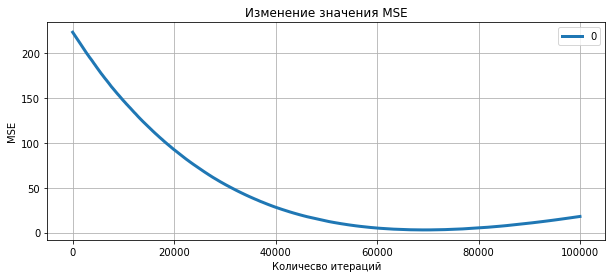

In [949]:
pd.DataFrame(sgd_result['MSE log'], range(sgd_result['n_iter'])).plot(
    xlabel='Количесво итераций',
    ylabel='MSE',
    figsize=(10, 4),
    title='Изменение значения MSE',
    grid = True,
    lw=3
)

**Выведите вектор весов, к которому сошелся метод.**

In [950]:
sgd_result['w']

array([17.70945203,  4.94302356,  3.36466676,  0.28256649])

**Выведите среднеквадратичную ошибку на последней итерации.**

In [951]:
print('MSE на последней итерации: ' ,sgd_result['MSE log'][-1].round(3))

print('MSE в точке минимума: ' ,sgd_result['MSE log'].min().round(3))

MSE на последней итерации:  18.07
MSE в точке минимума:  3.039


### Выводы:

1. Решение задачи методом координатного спуска показала такой же результат, как и при решении методом линейной регрессии (MSE = 2.874).
2. Решение задачи методот стохастического градиентоного спуска показало результат лучше (MSE = 2.999), чем при решении методом наивного прогноза (MSE = 27.086), но несколько хуже, чем методом координатного спуска и линейной регресии. 
3. Вероятно из-за ошибки в решении алгоритм не останавливается в точке минимума MSE и начинает возрастать.